# Week 1 - Tuesday lecture.

## Linear regression through least square minimisation

We'll sample points along a line and add noise. We'll then use Mean Square Error (MRSE) to find the coefficients of a line that fits at best the data.
You can change the standard deviation of the noise to 0 to check that you can recover exactly the original line. You can also increase it significantly and verify that the solution will diverge from the ground truth

In [301]:
import numpy as np
from numpy.linalg import pinv

num_points = 20
dim = 2
x_range = [0,5]

#assuming y = w0 x + w1
def noisy_data(w, num_points, dim, noise_std=0.3):
    x = np.linspace(x_range[0], x_range[1], num_points)
    y_true = w[0] * x + w[1]
    # Add Gaussian noise to the y values
    noise = np.random.normal(loc=0, scale=noise_std, size=num_points)
    y_noisy = y_true + noise
    return np.vstack([x,y_noisy]).T
    

true_w = np.random.uniform(low=0, high=5, size=(num_points))
points = noisy_data(true_w,num_points,dim)

points.shape

(20, 2)

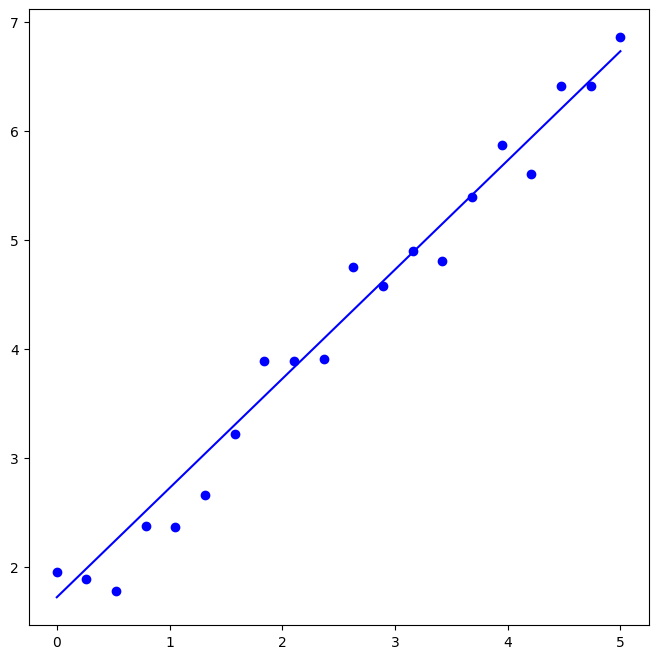

In [302]:
import matplotlib.pyplot as plt
#plotting

def plot_pts(plt):
    plt.scatter(points[:, 0], points[:,1], c='blue', label='Points')

def plot_line(plt, w, color="blue"):
    x = np.linspace(x_range[0], x_range[1], 100)
    y_pred = w[0] * x +  w[1] 
    plt.plot(x, y_pred, label=f'y = {w[0]}x + {w[1]}', color=color)

plt.figure(figsize=(8, 8))
plot_pts(plt)
plot_line(plt,true_w)

Let's write the points into the matrix form that we want 

In [303]:
def toMatrix(points):
    npts = points.shape[0]
    dim  = points.shape[1]
    X = np.ones((dim, npts))
    X[0,:] = points[:,0]   
    y      = points[:,1].reshape((-1,1))
    return X.T,y

In [304]:
X, y = toMatrix(points)

In [305]:
w = pinv(X.T.dot(X)).dot(X.T).dot(y)

In [306]:
x = np.linspace(0, 5, 100)

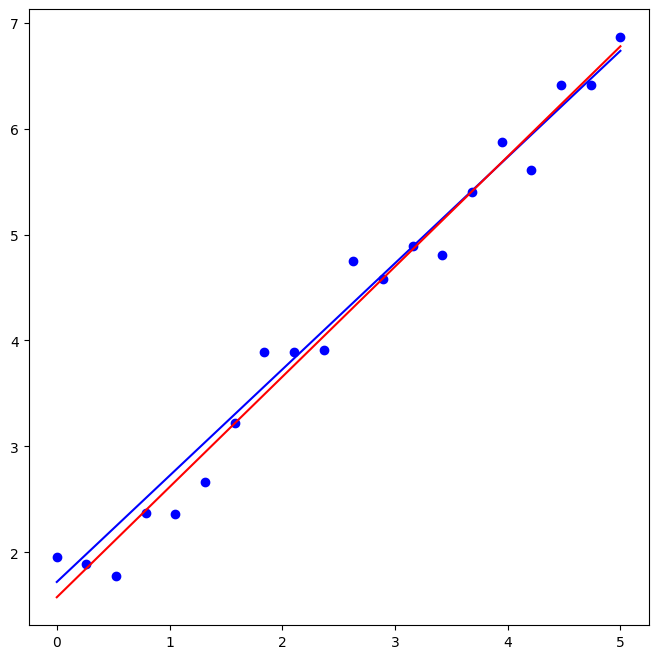

In [307]:
y_pred = w[0] * x +  w[1] 


plt.figure(figsize=(8, 8))
plot_pts(plt)
plot_line(plt,true_w)
plot_line(plt,w,"red")
